#Discert Random Variable
**Random Variable:** A random Variable is a real valued funciton of the experiment valued function of the experiment outcome.

A **discrete random variable** is a type of random variable that has a countable number of distinct values, such as heads or tails, playing cards, or the sides of a die.


###Bernoulli Random Varibale

The probability mass function (PMF) of a Bernoulli random variable X, with a probability p of success, is defined as:
   
    If k is any possible value of random varible X, The probability mass of k is the probability of event {X=k}i.e.
    
    P(X=k)={ p  ;if k=1,
            1−p ;if k=0,}

    



In [44]:
#Without using the APi for Distribution
import numpy as np
import matplotlib.pyplot as plt

def bernoulli_dist(p):
  x= np.array([0,1])
  pmf= np.array([1-p, p])
  cdf= np.cumsum(pmf)
  exp_x= np.sum([k*pmf[k] for k in x])
  var_x= np.sum([k**2*pmf[k] for k in x])-exp_x**2
  return pd.DataFrame({'x':x, 'pmf':pmf, 'cdf':cdf, 'Varience':var_x, 'Expectation': exp_x})

#example
p= 0.3
bernoulli_dist(p)

,x,pmf,cdf,Varience,Expectation
0,0,0.7,0.7,0.21,0.3
1,1,0.3,1.0,0.21,0.3


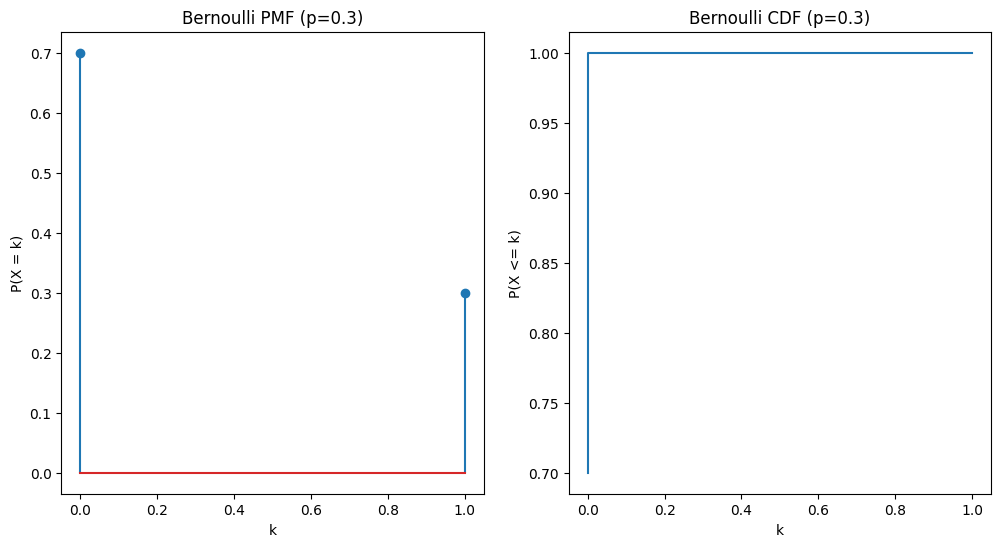

In [48]:
def plot_distribution(x,pmf,cdf):
  plt.figure(figsize=(12,6))

  # Ploting of PMF
  plt.subplot(1,2,1)
  plt.stem(x,pmf)
  plt.title(f"Bernoulli PMF (p={p})")
  plt.xlabel("k")
  plt.ylabel("P(X = k)")


  # Ploting of CDF
  plt.subplot(1,2,2)
  plt.step(x,cdf)
  plt.title(f"Bernoulli CDF (p={p})")
  plt.xlabel("k")
  plt.ylabel("P(X <= k)")
  plt.show()

x, pmf, cdf = bernoulli_dist(p)['x'], bernoulli_dist(p)['pmf'], bernoulli_dist(p)['cdf']
plot_distribution(x,pmf,cdf)

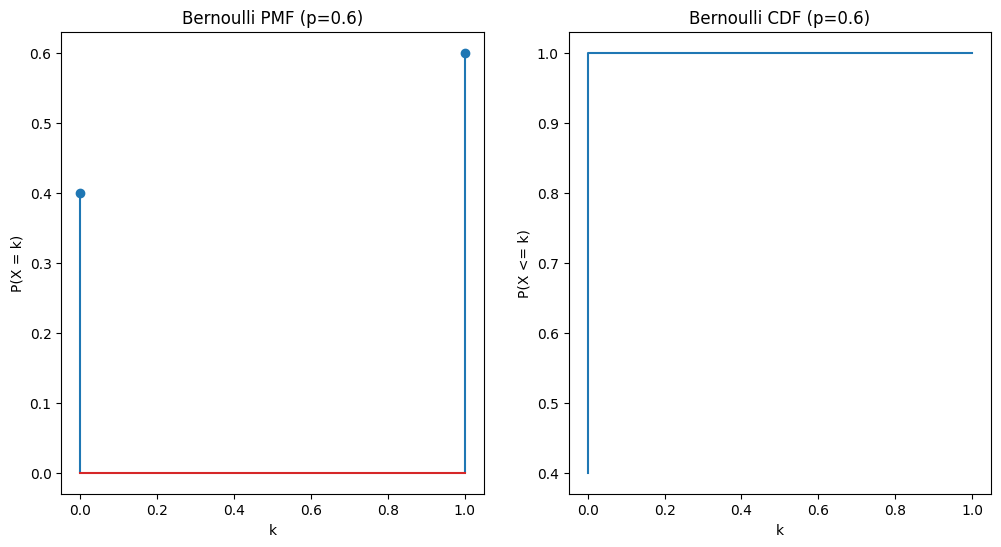

In [59]:
#by using the API for bernoulli Dist
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np

#parameters
p= 0.6
k_values= np.array([0,1])

#bernoulli PMF and CDF
pmf= bernoulli.pmf(k_values, p)
cdf= bernoulli.cdf(k_values, p)

#plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.stem(k_values,pmf)
plt.title(f"Bernoulli PMF (p={p})")
plt.xlabel("k")
plt.ylabel("P(X = k)")

plt.subplot(1,2,2)
plt.step(k_values,cdf)
plt.title(f"Bernoulli CDF (p={p})")
plt.xlabel("k")
plt.ylabel("P(X <= k)")
plt.show()

###Binomial random variable

```
Let k be the number of success in a n-trail X is called Binomial random variable with parameter n & p & the pmf of X is

P(X=k)= comb(n,k)*p**k(1-p)**n-k         ,k = 0,1,2...n

F(X=k)= ∑{comb(n,k)}
```

In [29]:
#without using any API for binomial dist
import numpy as np
import pandas as pd
from math import comb, factorial
import matplotlib.pyplot as plt


#n = number of trail, p = prob of success
def binomial_dist(n,p):
  x= np.arange(0,n+1)
  pmf= [comb(n,k)*(p**k)*((1-p)**(n-k)) for k in x]
  cdf= np.cumsum(pmf)
  exp_x= np.sum([k*pmf[k] for k in x])
  var_x= np.sum([k**2*pmf[k] for k in x])-exp_x**2
  return pd.DataFrame({'x':x, 'pmf':pmf, 'cdf':cdf, 'Varience':var_x, 'Expectation': exp_x})

#example
n,p= 10, 0.5
binomial_dist(n,p)

,x,pmf,cdf,Varience,Expectation
0,0,0.000977,0.000977,2.5,5.0
1,1,0.009766,0.010742,2.5,5.0
2,2,0.043945,0.054688,2.5,5.0
3,3,0.117188,0.171875,2.5,5.0
4,4,0.205078,0.376953,2.5,5.0
5,5,0.246094,0.623047,2.5,5.0
6,6,0.205078,0.828125,2.5,5.0
7,7,0.117188,0.945312,2.5,5.0
8,8,0.043945,0.989258,2.5,5.0
9,9,0.009766,0.999023,2.5,5.0


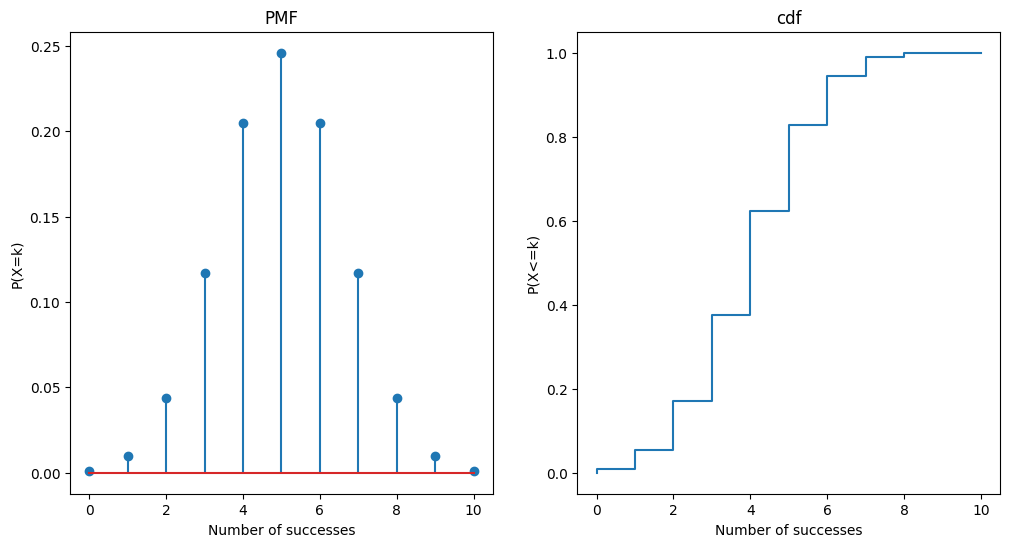

In [28]:
def plot_distribution(x,pmf,cdf):
 plt.figure(figsize=(12,6))

 # Ploting of PMF
 plt.subplot(1,2,1)
 plt.stem(x,pmf)
 plt.title('PMF')
 plt.xlabel('Number of successes')
 plt.ylabel('P(X=k)')

 # Ploting of CDF
 plt.subplot(1,2,2)
 plt.step(x,cdf)
 plt.title('cdf')
 plt.xlabel('Number of successes')
 plt.ylabel('P(X<=k)')

x, pmf, cdf = binomial_dist(n,p)['x'], binomial_dist(n,p)['pmf'], binomial_dist(n,p)['cdf']
plot_distribution(x,pmf,cdf)

Text(0, 0.5, 'P(X<=k)')

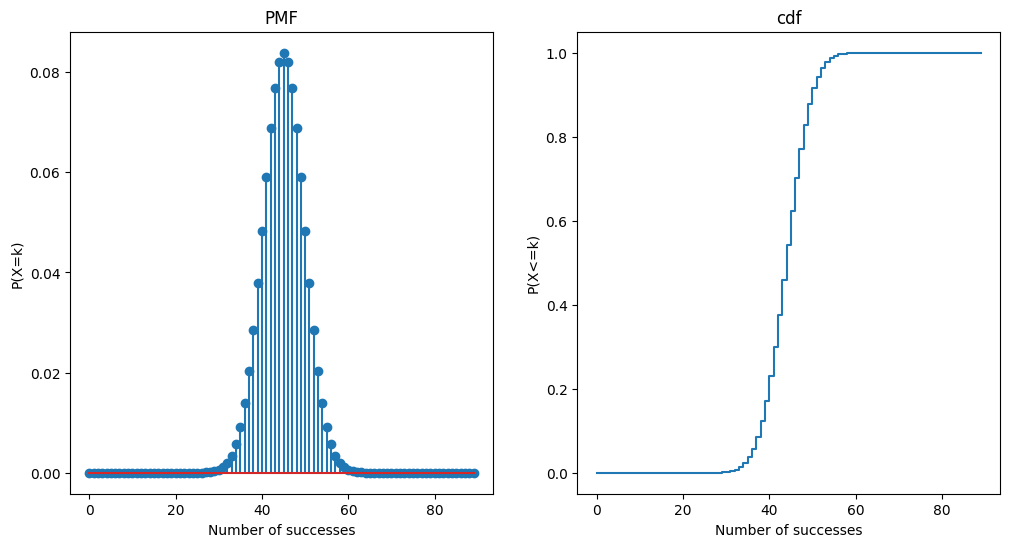

In [34]:
#binomial dist with using the API
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

#parameters
n=90
p=0.5
k_values= np.arange(0,n)

#binomial PMF and CDF
pmf= binom.pmf(k_values, n, p)
cdf= binom.cdf(k_values, n, p)

#plot
plt.figure(figsize=(12,6))

# Ploting of PMF
plt.subplot(1,2,1)
plt.stem(k_values,pmf)
plt.title('PMF')
plt.xlabel('Number of successes')
plt.ylabel('P(X=k)')

# Ploting of CDF
plt.subplot(1,2,2)
plt.step(k_values,cdf)
plt.title('cdf')
plt.xlabel('Number of successes')
plt.ylabel('P(X<=k)')



###Geometric Random Variable

```
The geometric random variable is the number k of trail to get the first success. Its PMF is given by

P(X=k)= ((1-p)**(k-1))*p          , k = 1,2,3...

```

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#p = prob of first success at n trail, n= number of trail
def geometric_dist(p,n):
  x= np.arange(1,n+1)
  pmf= ((1-p)**(x-1))*p
  cdf= np.cumsum(pmf)
  exp_x= np.sum([k*pmf[k-1] for k in x])
  var_x= np.sum([k**2*pmf[k-1] for k in x])-exp_x**2
  return pd.DataFrame({'Number of trail':x, 'pmf':pmf, 'cdf':cdf, 'Varience':var_x, 'Expectation': exp_x})

#example
p= 0.3
n=10
geometric_dist(p,n)

,Number of trail,pmf,cdf,Varience,Expectation
0,1,0.300000,0.300000,4.905331,2.9567
1,2,0.210000,0.510000,4.905331,2.9567
2,3,0.147000,0.657000,4.905331,2.9567
3,4,0.102900,0.759900,4.905331,2.9567
4,5,0.072030,0.831930,4.905331,2.9567
5,6,0.050421,0.882351,4.905331,2.9567
6,7,0.035295,0.917646,4.905331,2.9567
7,8,0.024706,0.942352,4.905331,2.9567
8,9,0.017294,0.959646,4.905331,2.9567
9,10,0.012106,0.971752,4.905331,2.9567


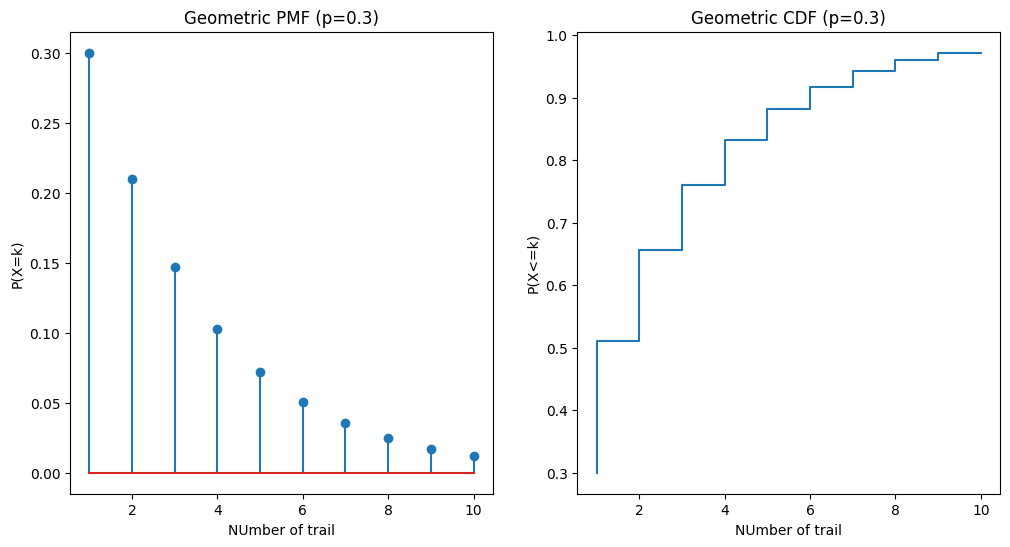

In [63]:
def plot_distribution(x,pmf,cdf):
  plt.figure(figsize=(12,6))
  # Ploting of PMF
  plt.subplot(1,2,1)
  plt.stem(x,pmf)
  plt.title(f"Geometric PMF (p={p})")
  plt.xlabel('NUmber of trail')
  plt.ylabel('P(X=k)')

  # Ploting of CDF
  plt.subplot(1,2,2)
  plt.step(x,cdf)
  plt.title(f"Geometric CDF (p={p})")
  plt.xlabel('NUmber of trail')
  plt.ylabel('P(X<=k)')
  plt.show()

x, pmf, cdf = geometric_dist(p,n)['Number of trail'], geometric_dist(p,n)['pmf'], geometric_dist(p,n)['cdf']
plot_distribution(x,pmf,cdf)

Text(0, 0.5, 'P(X<=k)')

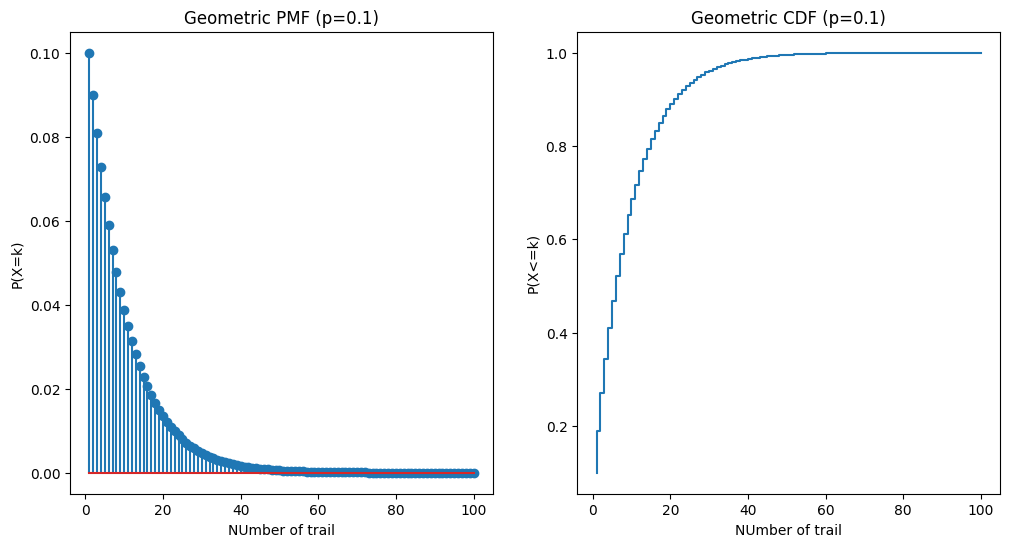

In [67]:
#with API
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np

#parameters
p= 0.1
n=100

#values
k_values= np.arange(1,n+1)
pmf= geom.pmf(k_values, p)
cdf= geom.cdf(k_values, p)

#plotting
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.stem(k_values,pmf)
plt.title(f"Geometric PMF (p={p})")
plt.xlabel('NUmber of trail')
plt.ylabel('P(X=k)')

plt.subplot(1,2,2)
plt.step(k_values,cdf)
plt.title(f"Geometric CDF (p={p})")
plt.xlabel('NUmber of trail')
plt.ylabel('P(X<=k)')


###Poission Random Variable
 Poisson distribution represents the number of events occurring in a ,k, fixed interval of time or space, given that events occur with a known constant rate and independently of the time since the last event.

 ```
 P(X=k) =(lamb**k)*exp(-lamb)/factorial(k)
 ```


In [71]:
#without API for distribution
from math import exp, factorial
def poisson_dist(lamb,n):
  x= np.arange(1,n+1)
  pmf=[(lamb**k)*exp(-lamb)/factorial(k) for k in x]
  cdf= np.cumsum(pmf)
  exp_x= np.sum([k*pmf[k-1] for k in x])
  var_x= np.sum([k**2*pmf[k-1] for k in x])-exp_x**2
  return pd.DataFrame({'Number of events':x, 'pmf':pmf, 'cdf':cdf, 'Varience':var_x, 'Expectation': exp_x})

#example
lamb= 2
n=10
poisson_dist(lamb,n)


,Number of events,pmf,cdf,Varience,Expectation
0,1,0.270671,0.270671,1.999329,1.999907
1,2,0.270671,0.541341,1.999329,1.999907
2,3,0.180447,0.721788,1.999329,1.999907
3,4,0.090224,0.812012,1.999329,1.999907
4,5,0.036089,0.848101,1.999329,1.999907
5,6,0.012030,0.860131,1.999329,1.999907
6,7,0.003437,0.863568,1.999329,1.999907
7,8,0.000859,0.864427,1.999329,1.999907
8,9,0.000191,0.864618,1.999329,1.999907
9,10,0.000038,0.864656,1.999329,1.999907


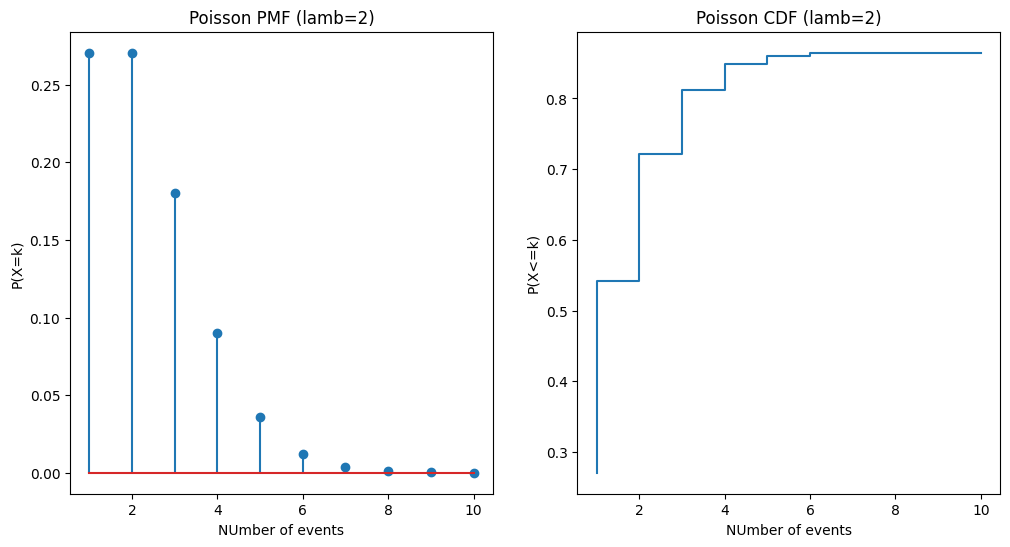

In [72]:
def plot_distribution(x,pmf,cdf):
  plt.figure(figsize=(12,6))
  # Ploting of PMF
  plt.subplot(1,2,1)
  plt.stem(x,pmf)
  plt.title(f"Poisson PMF (lamb={lamb})")
  plt.xlabel('NUmber of events')
  plt.ylabel('P(X=k)')

  # Ploting of CDF
  plt.subplot(1,2,2)
  plt.step(x,cdf)
  plt
  plt.title(f"Poisson CDF (lamb={lamb})")
  plt.xlabel('NUmber of events')
  plt.ylabel('P(X<=k)')
  plt.show()

x, pmf, cdf = poisson_dist(lamb,n)['Number of events'], poisson_dist(lamb,n)['pmf'], poisson_dist(lamb,n)['cdf']
plot_distribution(x,pmf,cdf)

Text(0, 0.5, 'P(X<=k)')

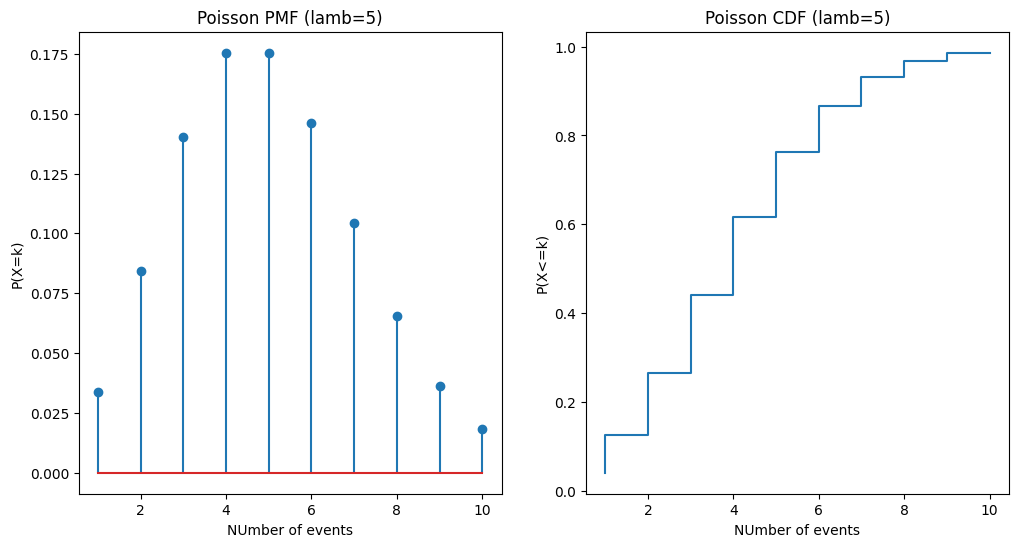

In [79]:
#with Using the API
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

#parameters
lamb= 5
n=10

#values
k_values= np.arange(1,n+1)
pmf= poisson.pmf(k_values, lamb)
cdf= poisson.cdf(k_values, lamb)

#plotting
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.stem(k_values,pmf)
plt.title(f"Poisson PMF (lamb={lamb})")
plt.xlabel('NUmber of events')
plt.ylabel('P(X=k)')

plt.subplot(1,2,2)
plt.step(k_values,cdf)
plt.title(f"Poisson CDF (lamb={lamb})")
plt.xlabel('NUmber of events')
plt.ylabel('P(X<=k)')
